In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Kuramoto model
$$ \dot \varphi_i = \omega_i + \frac K N \sum_{j=1}^N{a_{ij}}\sin(\varphi_j - \varphi_i)$$

0.10162228344046526
(2000,)


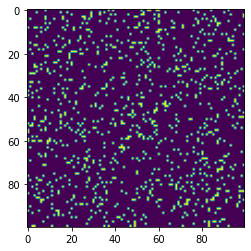

In [2]:
#define all needed variables
N = 100
phi = np.zeros(N)
omega = np.random.uniform(low=-1, high=1, size=(N))
# omega = omega**3 - 0.3*omega
K = 9.5

def make_A(N, p = 1):
    #make an adjaceny matrix with p chance that any two give oscillators are connected. 
    #p = 1 is fully connected. 
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1,N):
            if(np.random.uniform() < p):
                A[i,j] = 1
                A[j,i] = 1
    return A

# A = np.ones((N,N)) - np.eye(N) #this is all to all right now, but want to make it so you can set the number of connections
A = make_A(N, p = 0.1)
print(np.sum(A)/((N-1)**2))
plt.figure()
plt.imshow(A)
dt = 0.01 #timestep size, if this is too large, weird things seem to be happening
T_max = 20 #maximum time to run simulation for
t = np.arange(0, T_max, dt)
print(t.shape)

In [3]:
def phi_dot(phi, t, omega, K, A):
    N = len(phi)
    dphi_dt = np.zeros(np.shape(phi))
    for i in range(N):
        dphi_dt[i] = omega[i] + K/N *np.sum(A[i]@np.sin(phi - phi[i]))
    return dphi_dt

def run_and_graph(omega, K=10, T_max =20, dt = 0.01, p = 1, N = 100):
    plt.figure()
#     if A is None:
    A = make_A(N, p = p)
    sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
    for i in range(min(10, N)):
        plt.plot(np.arange(0, T_max, dt), sol[:,i])
    plt.plot(np.linspace(0,T_max), np.linspace(0,T_max)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)
    plt.xlabel("time")
    plt.ylabel("solution value ")
    plt.title("first 10 phases with p = "+ str(p))
    plt.show()

[ 14.74896523   7.68097312   2.44684701 -13.04270989   1.72474657
 -15.02970836   6.46358785  -0.10564317 -13.10965808   8.28517745
  14.08126843   2.20749503 -14.84414356  13.49561181 -17.15447898
  -7.16580038 -14.06297403   7.42372517  -6.99169868   8.51676874
   0.75895772 -10.82221748 -18.77966869   5.83984235   0.45619666
   3.90186253   9.87121293   5.59285657   4.61745965  -4.49696865
  -0.19414731  -3.56653813   8.6760249    2.32393902   5.61875249
   3.83681797   5.08245167 -16.1693025    8.08077812   6.41445528
  -5.99153632   9.05957647  22.37020621  -0.1013061   19.3493251
   2.26669304   2.72390328  13.82850592  -7.50957037   5.30870966
   6.68288854  15.29408437  -6.47382114 -14.59830121   2.59214999
   6.40829926 -18.04668078  14.16468112   2.2626152    0.72224021
 -12.78907847  20.92851892 -14.1080276    1.61690189 -12.83329811
 -10.7307587    1.89185653  13.26648769   5.79738095   1.54186475
   9.05280717  14.28189502   2.4882681    2.19983262  14.52634798
   6.250482

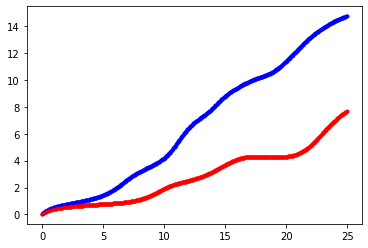

In [4]:
n_timestep = 500
dt = 0.05
t = 0
phi = np.zeros(N)
for i in range(n_timestep):
    phi += phi_dot(phi, t, omega, K, A)*dt
#     print(phi)
#     for j in range(len(phi)):
#         if(phi[j]<0):
#             phi[j] += 2*np.pi
#         if(phi[j]>(2*np.pi)):
#             phi[j] -= 2*np.pi
    plt.plot(t, phi[0], 'b.')
    plt.plot(t, phi[1], 'r.')
    t += dt
print(phi)

In [44]:
#do the integration part
A = make_A(N, p = 0.1)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))

(400, 100)


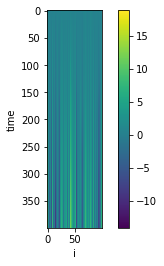

In [45]:
print(sol.shape)
plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()

0.05318802703442404


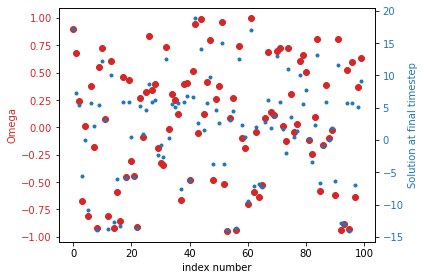

In [46]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('index number')
ax1.set_ylabel('Omega', color=color)
# omega_test = omega +np.random.uniform(0,1, size = (omega.shape))
ax1.plot(omega, 'o', color=color,linewidth=7.0)
print(np.mean(omega))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Solution at final timestep', color=color)  # we already handled the x-label with ax1
ax2.plot(sol[-1,:], '.', color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

(400, 100)
0.05318802703442404


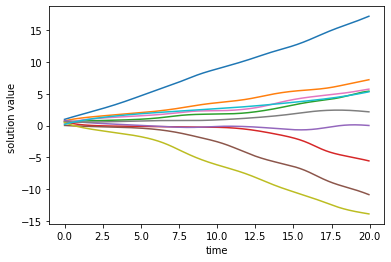

In [47]:
print(sol.shape)
# plt.plot(np.sin(sol[:,0]))
# plt.plot(sol[:,0])
# plt.plot(sol[:,1])
# plt.plot(sol[:,2])
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")

# plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

print(np.mean(omega))
# plt.plot(np.sin(sol[:,1]))
# plt.plot(np.sin(sol[:,2]))

In [48]:
u, s, vh = np.linalg.svd(sol)

[8.17757463e+02 7.55883082e+01 3.63576986e+01 2.34972715e+01
 1.54615697e+01 1.31906982e+01 1.07309954e+01 7.19093466e+00
 3.55864909e+00 2.63678549e+00 1.68060340e+00 1.37709163e+00
 1.28665357e+00 7.87627644e-01 5.68754762e-01 3.50666743e-01
 2.16947906e-01 1.93804963e-01 1.65104123e-01 9.88045608e-02
 6.41206508e-02 5.35566292e-02 2.91879330e-02 2.28517014e-02
 1.95953659e-02 1.31318025e-02 1.01114831e-02 6.26772195e-03
 4.68745854e-03 4.31937057e-03 2.74711605e-03 1.78551497e-03
 1.39012004e-03 1.15689561e-03 9.16547025e-04 7.52391840e-04
 4.09728086e-04 2.53076475e-04 2.21781309e-04 1.84283876e-04
 1.35459405e-04 1.17781073e-04 7.54058123e-05 5.03178532e-05
 3.98357291e-05 3.09385349e-05 2.32436388e-05 1.71927326e-05
 1.28780637e-05 7.76489340e-06 6.21331090e-06 4.53086740e-06
 3.90291953e-06 3.54589721e-06 2.10763079e-06 1.23676283e-06
 9.57988189e-07 6.66961083e-07 5.20593114e-07 4.44456534e-07
 3.01020527e-07 1.86103998e-07 1.57309177e-07 1.30713957e-07
 1.01345610e-07 6.496195

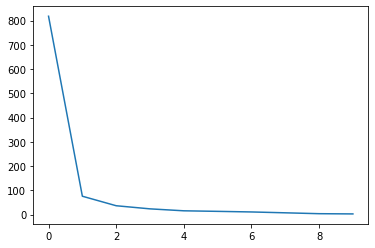

In [67]:
plt.plot(s[:10])
print(s)
# plt.plot([0,100], [0,0])

In [50]:
n_important = 3

print(u[:,:n_important].shape)
print(np.diag(s[:n_important]).shape)
print(vh[:n_important,:].shape)
low_rank = (u[:,:n_important]@np.diag(s[:n_important]))@vh[:n_important, :]

(400, 3)
(3, 3)
(3, 100)


MSE error =  36.25295770747684


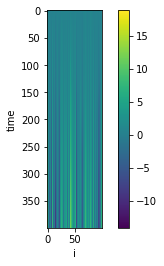

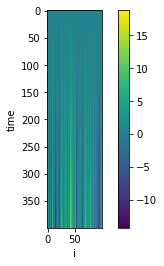

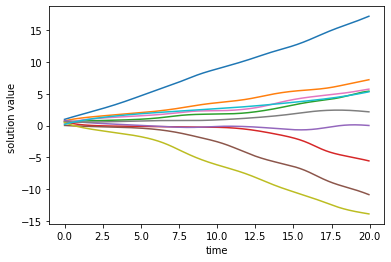

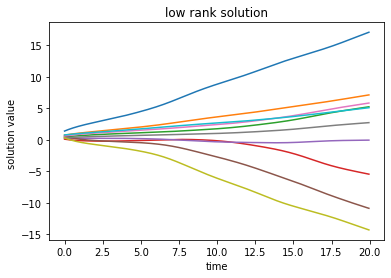

In [51]:
print("MSE error = ", np.linalg.norm(low_rank - sol))

plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()
plt.show()

plt.imshow(low_rank)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()
plt.show()

for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.show()


for i in range(10):
    plt.plot(np.arange(0, T_max, dt), low_rank[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("low rank solution")
plt.show()


In [52]:
error_list = []
for i in range(10):
    u1, s1, vh1 = np.linalg.svd(sol, full_matrices=True)
    low_rank1 = (u1[:,:i]@np.diag(s1[:i]))@vh1[:i, :]
    error_list.append(np.linalg.norm(low_rank1 - sol))

[864.8341898322539, 99.51431207231253, 54.10364864039879, 36.25295770747684, 25.75902926190431, 19.336114964941828, 13.227188853688645, 9.500808822622608, 6.645108149233122, 4.504036767935686]
[859.0896796   83.52181458  40.16127306  25.50978938  17.01887912
  14.10414184   9.2028885    6.79028026   4.88580752   2.88428722]


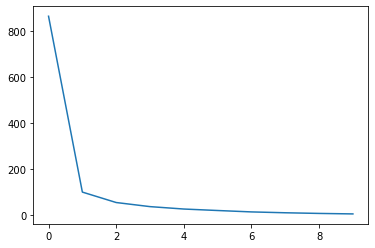

In [53]:
plt.plot(error_list)
print(error_list)
print(s[:10])
# plt.plot(s[:10])

MSE error =  53.49409981068215
MSE error end =  2.99678736001317
[764.53660708  73.17050671  39.38952691  21.8182916   20.61832198
  15.38682401   9.96839598   6.13762827   3.70992446   3.32266406]


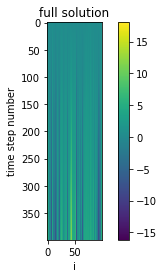

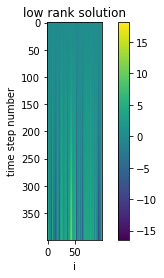

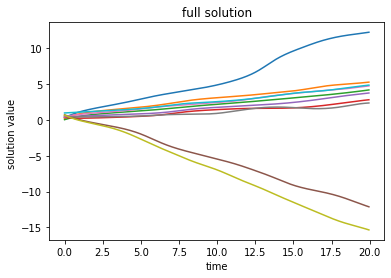

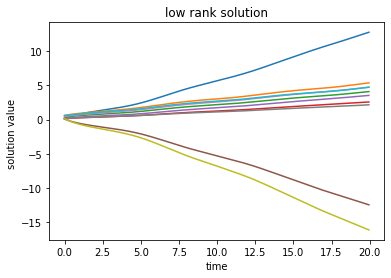

In [68]:
#the svd stuff all in one block
n_important = 2
A = make_A(N, p = 0.1)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
u, s, vh = np.linalg.svd(sol)

low_rank = (u[:,:n_important]@np.diag(s[:n_important]))@vh[:n_important, :]

print("MSE error = ", np.linalg.norm(low_rank - sol))
print("MSE error end = ", np.linalg.norm(low_rank[:,-1] - sol[:, -1]))
print(s[:10])

plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time step number")
plt.title("full solution")
plt.colorbar()
plt.show()

plt.imshow(low_rank)
plt.xlabel("i")
plt.ylabel("time step number")
plt.title("low rank solution")
plt.colorbar()
plt.show()

for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("full solution")
plt.show()


for i in range(10):
    plt.plot(np.arange(0, T_max, dt), low_rank[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("low rank solution")
plt.show()

Text(0.5, 1.0, 'first 10 phases with p = 0.1')

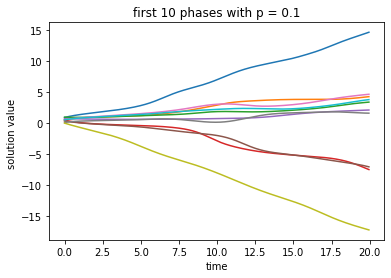

In [43]:
p = 0.1
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

Text(0.5, 1.0, 'first 10 phases with p = 0.2')

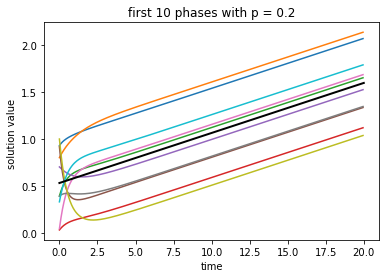

In [16]:
p = 0.2
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

Text(0.5, 1.0, 'first 10 phases with p = 0.5')

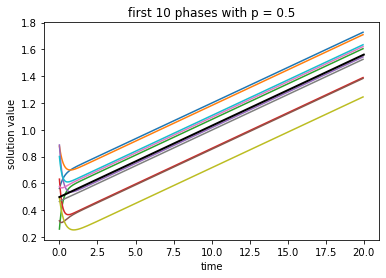

In [17]:
p = 0.5
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

Text(0.5, 1.0, 'first 10 phases with p = 1')

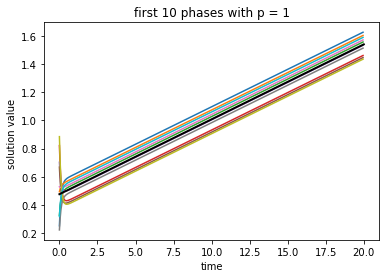

In [18]:
p = 1
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

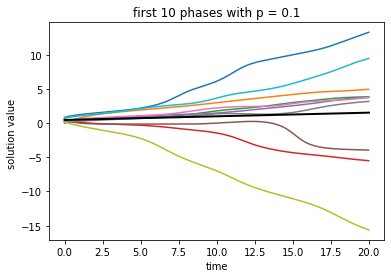

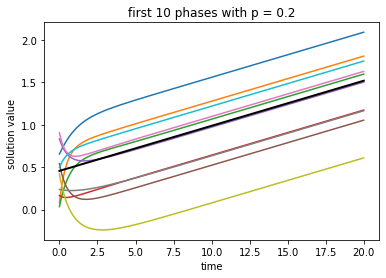

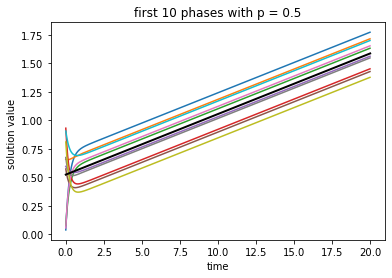

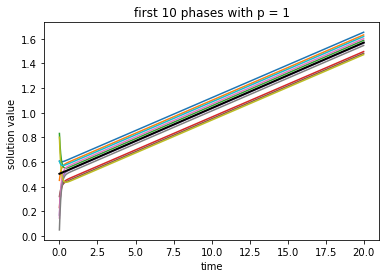

In [56]:
def phi_dot(phi, t, omega, K, A):
    N = len(phi)
    dphi_dt = np.zeros(np.shape(phi))
    for i in range(N):
        dphi_dt[i] = omega[i] + K/N *np.sum(A[i]@np.sin(phi - phi[i]))
    return dphi_dt

def run_and_graph(omega, K=10, T_max =20, dt = 0.01, p = 1, N = 100):
    plt.figure()
#     if A is None:
    A = make_A(N, p = p)
    sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
    for i in range(min(10, N)):
        plt.plot(np.arange(0, T_max, dt), sol[:,i])
    plt.plot(np.linspace(0,T_max), np.linspace(0,T_max)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)
    plt.xlabel("time")
    plt.ylabel("solution value ")
    plt.title("first 10 phases with p = "+ str(p))
    plt.show()
    
run_and_graph(omega, p = .1)
run_and_graph(omega, p = .2)
run_and_graph(omega, p = .5)
run_and_graph(omega, p = 1)